In [84]:
import numpy as np
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from scipy.stats import t
from scipy.optimize import minimize
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller


In [2]:
start_date = '2019-01-01'
end_date = '2024-01-01'



In [3]:
nasdaq = yf.download('^IXIC', start=start_date, end=end_date)
nasdaq['Return'] = nasdaq['Adj Close'].pct_change().dropna()


[*********************100%%**********************]  1 of 1 completed


In [4]:
# Collecte des données d'actif sans risque
# Taux des bons du Trésor américain à 10 ans
treasury_10yr = web.DataReader('DGS10', 'fred', start_date, end_date)
treasury_10yr = treasury_10yr / 100  # Convertir en fraction

In [5]:
# Collecte des données pour 5 titres choisis
# Apple (AAPL)
aapl = yf.download('AAPL', start=start_date, end=end_date)
aapl['Return'] = aapl['Adj Close'].pct_change().dropna()

# Microsoft (MSFT)
msft = yf.download('MSFT', start=start_date, end=end_date)
msft['Return'] = msft['Adj Close'].pct_change().dropna()

# Amazon (AMZN)
amzn = yf.download('AMZN', start=start_date, end=end_date)
amzn['Return'] = amzn['Adj Close'].pct_change().dropna()

# Google (GOOGL)
googl = yf.download('GOOGL', start=start_date, end=end_date)
googl['Return'] = googl['Adj Close'].pct_change().dropna()

# Facebook (META)
meta = yf.download('META', start=start_date, end=end_date)
meta['Return'] = meta['Adj Close'].pct_change().dropna()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:

# Afficher un échantillon des données
print("NASDAQ Data:")
print(nasdaq.head())





NASDAQ Data:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-02  6506.910156  6693.709961  6506.879883  6665.939941  6665.939941   
2019-01-03  6584.770020  6600.209961  6457.129883  6463.500000  6463.500000   
2019-01-04  6567.140137  6760.689941  6554.240234  6738.859863  6738.859863   
2019-01-07  6757.529785  6855.600098  6741.399902  6823.470215  6823.470215   
2019-01-08  6893.439941  6909.580078  6795.859863  6897.000000  6897.000000   

                Volume    Return  
Date                              
2019-01-02  2261800000       NaN  
2019-01-03  2631550000 -0.030369  
2019-01-04  2596150000  0.042602  
2019-01-07  2523450000  0.012556  
2019-01-08  2407340000  0.010776  


In [7]:
print("\nUS 10-Year Treasury Rate:")
print(treasury_10yr.head())


US 10-Year Treasury Rate:
             DGS10
DATE              
2019-01-01     NaN
2019-01-02  0.0266
2019-01-03  0.0256
2019-01-04  0.0267
2019-01-07  0.0270


In [8]:
print("\nApple Data:")
print(aapl.head())




Apple Data:
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-01-02  38.722500  39.712502  38.557499  39.480000  37.793789  148158800   
2019-01-03  35.994999  36.430000  35.500000  35.547501  34.029240  365248800   
2019-01-04  36.132500  37.137501  35.950001  37.064999  35.481918  234428400   
2019-01-07  37.174999  37.207500  36.474998  36.982498  35.402950  219111200   
2019-01-08  37.389999  37.955002  37.130001  37.687500  36.077854  164101200   

              Return  
Date                  
2019-01-02       NaN  
2019-01-03 -0.099608  
2019-01-04  0.042689  
2019-01-07 -0.002226  
2019-01-08  0.019063  


In [9]:
print("\nMicrosoft Data:")
print(msft.head())




Microsoft Data:
                  Open        High         Low       Close  Adj Close  \
Date                                                                    
2019-01-02   99.550003  101.750000   98.940002  101.120003  95.673462   
2019-01-03  100.099998  100.190002   97.199997   97.400002  92.153816   
2019-01-04   99.720001  102.510002   98.930000  101.930000  96.439827   
2019-01-07  101.639999  103.269997  100.980003  102.059998  96.562828   
2019-01-08  103.040001  103.970001  101.709999  102.800003  97.262970   

              Volume    Return  
Date                            
2019-01-02  35329300       NaN  
2019-01-03  42579100 -0.036788  
2019-01-04  44060600  0.046509  
2019-01-07  35656100  0.001275  
2019-01-08  31514400  0.007251  


In [10]:
print("\nAmazon Data:")
print(amzn.head())



Amazon Data:
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-01-02  73.260002  77.667999  73.046501  76.956497  76.956497  159662000   
2019-01-03  76.000504  76.900002  74.855499  75.014000  75.014000  139512000   
2019-01-04  76.500000  79.699997  75.915497  78.769501  78.769501  183652000   
2019-01-07  80.115501  81.727997  79.459503  81.475502  81.475502  159864000   
2019-01-08  83.234497  83.830498  80.830498  82.829002  82.829002  177628000   

              Return  
Date                  
2019-01-02       NaN  
2019-01-03 -0.025241  
2019-01-04  0.050064  
2019-01-07  0.034353  
2019-01-08  0.016612  


In [11]:
print("\nGoogle Data:")
print(googl.head())



Google Data:
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2019-01-02  51.360001  53.039501  51.264000  52.734001  52.734001  31868000   
2019-01-03  52.533501  53.313000  51.118500  51.273499  51.273499  41960000   
2019-01-04  52.127998  54.000000  51.842999  53.903500  53.903500  46022000   
2019-01-07  54.048500  54.134998  53.132000  53.796001  53.796001  47446000   
2019-01-08  54.299999  54.667500  53.417500  54.268501  54.268501  35414000   

              Return  
Date                  
2019-01-02       NaN  
2019-01-03 -0.027696  
2019-01-04  0.051294  
2019-01-07 -0.001994  
2019-01-08  0.008783  


In [12]:


print("\nFacebook Data:")
print(meta.head())



Facebook Data:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02  128.990005  137.509995  128.559998  135.679993  135.536194   
2019-01-03  134.690002  137.169998  131.119995  131.740005  131.600372   
2019-01-04  134.009995  138.000000  133.750000  137.949997  137.803787   
2019-01-07  137.559998  138.869995  135.910004  138.050003  137.903687   
2019-01-08  139.889999  143.139999  139.539993  142.529999  142.378937   

              Volume    Return  
Date                            
2019-01-02  28146200       NaN  
2019-01-03  22717900 -0.029039  
2019-01-04  29002100  0.047138  
2019-01-07  20089300  0.000725  
2019-01-08  26263800  0.032452  


In [13]:
# Save data to Excel files
nasdaq.to_excel('nasdaq_data.xlsx', sheet_name='NASDAQ')
treasury_10yr.to_excel('treasury_10yr_data.xlsx', sheet_name='10Y Treasury Rate')
aapl.to_excel('apple_data.xlsx', sheet_name='Apple')
msft.to_excel('microsoft_data.xlsx', sheet_name='Microsoft')
amzn.to_excel('amazon_data.xlsx', sheet_name='Amazon')
googl.to_excel('google_data.xlsx', sheet_name='Google')
meta.to_excel('facebook_data.xlsx', sheet_name='Facebook')


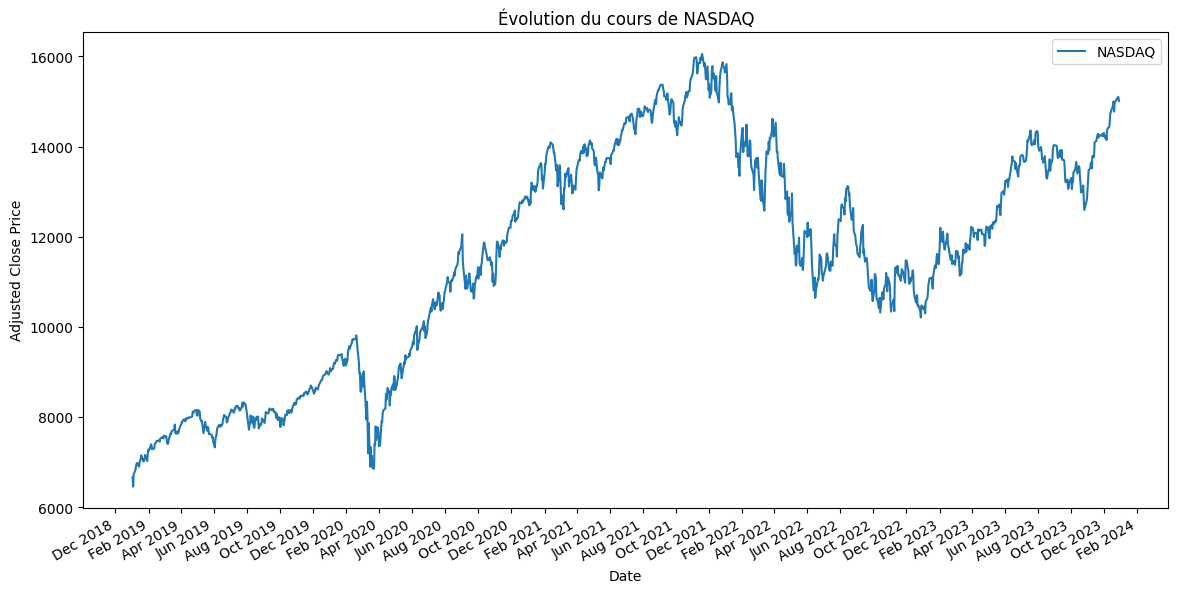

In [14]:
def plot_individual_price_evolution(data, stock_name, title):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Adj Close'], label=stock_name)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    
    # Format the x-axis to show every other month
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    
    plt.gcf().autofmt_xdate()  # Rotate date labels automatically
    plt.show()


plot_individual_price_evolution(nasdaq, 'NASDAQ', 'Évolution du cours de NASDAQ')






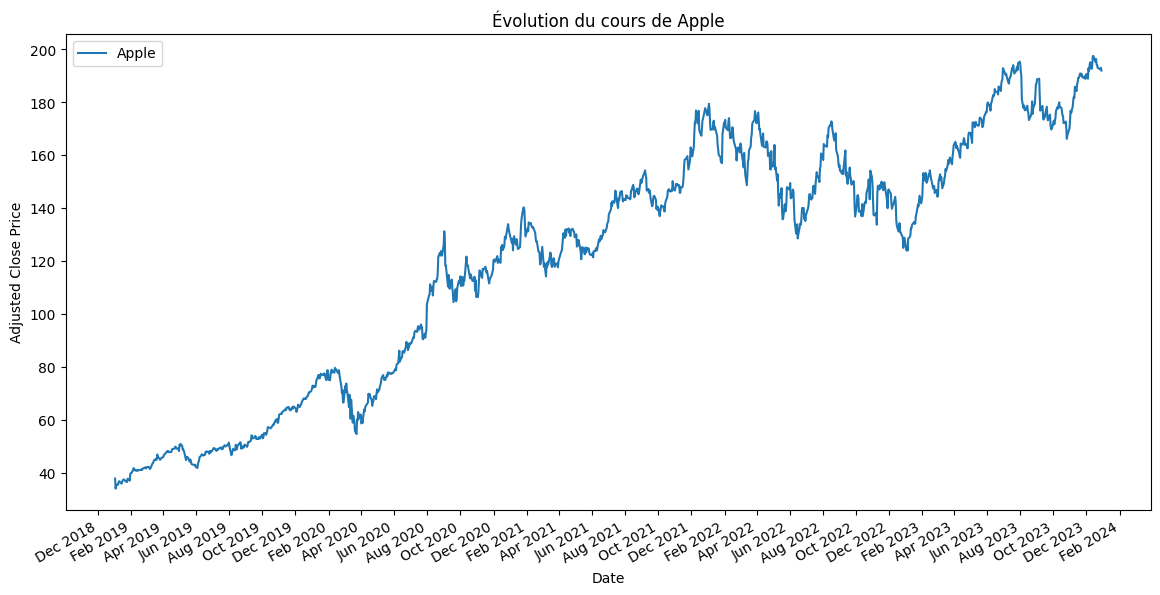

In [15]:
plot_individual_price_evolution(aapl, 'Apple', 'Évolution du cours de Apple')

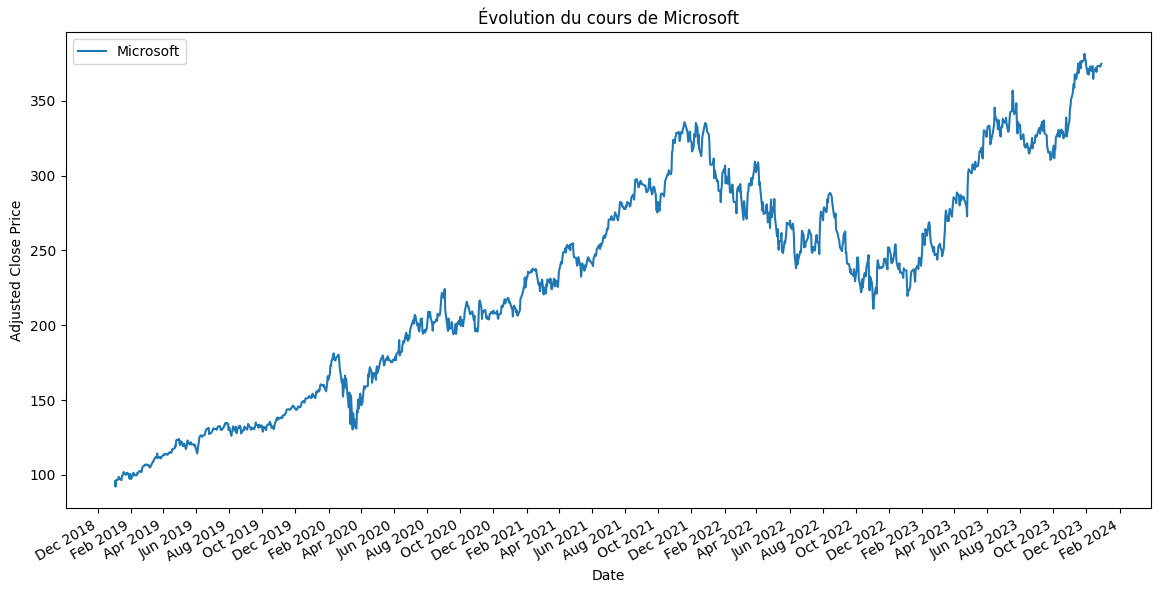

In [16]:
plot_individual_price_evolution(msft, 'Microsoft', 'Évolution du cours de Microsoft')

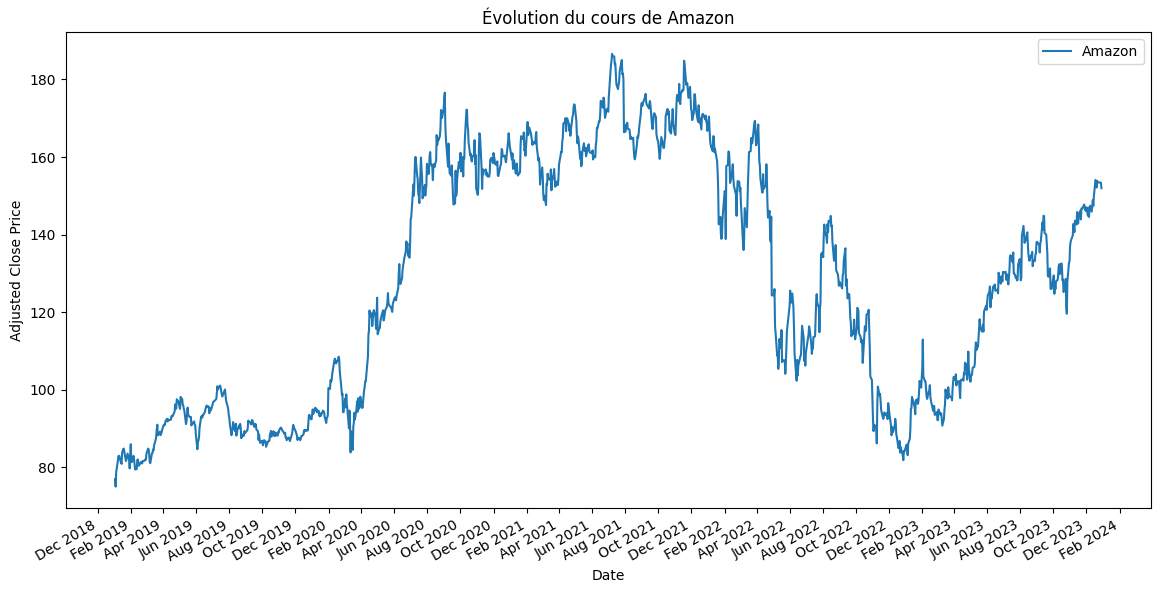

In [17]:
plot_individual_price_evolution(amzn, 'Amazon', 'Évolution du cours de Amazon')

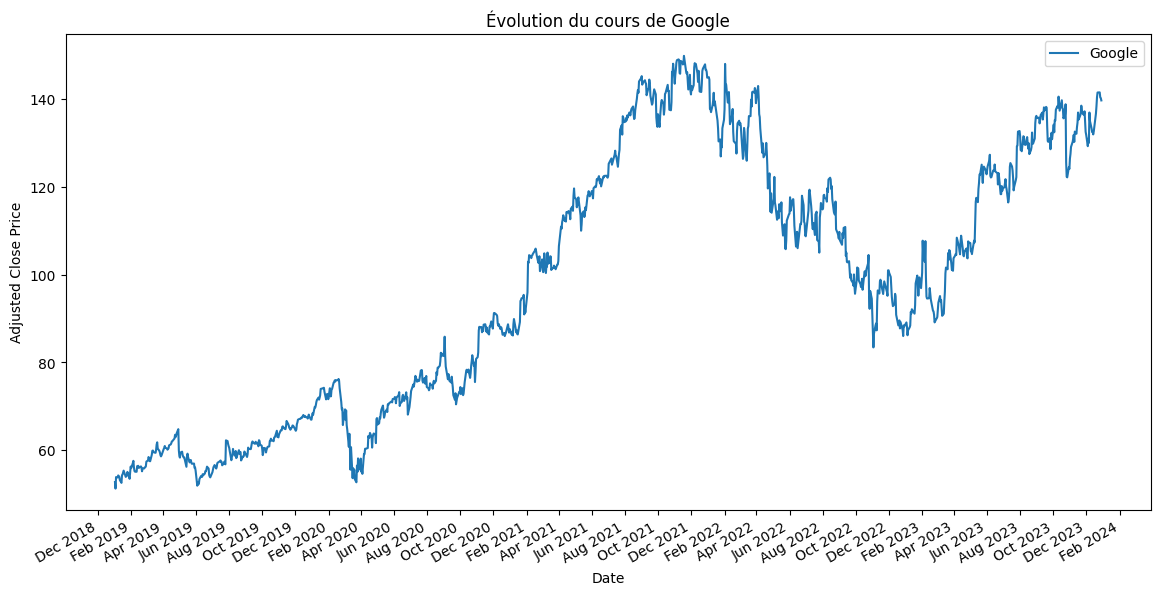

In [18]:
plot_individual_price_evolution(googl, 'Google', 'Évolution du cours de Google')

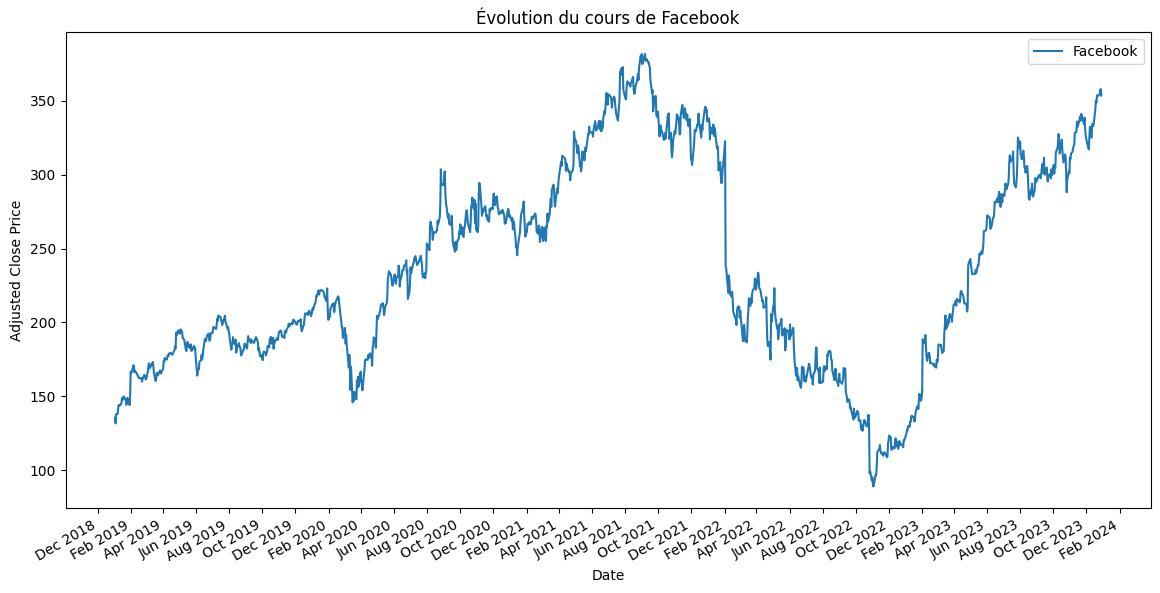

In [19]:
plot_individual_price_evolution(meta, 'Facebook', 'Évolution du cours de Facebook')


In [20]:
def clean_data(data):
    # Supprimer les NaNs et les valeurs infinies
    data = data.replace([np.inf, -np.inf], np.nan)
    data = data.dropna()
    return data

# Nettoyer les données
aapl = clean_data(aapl)
msft = clean_data(msft)
amzn = clean_data(amzn)
googl = clean_data(googl)
meta = clean_data(meta)
nasdaq = clean_data(nasdaq)


In [36]:
def display_results(stock_name, stock_data, market_data, rf_rate):
    alpha, beta, model = estimate_capm(stock_data['Return'], market_data['Return'], rf_rate)
    
    alpha_tstat = model.tvalues[0]
    alpha_pvalue = model.pvalues[0]
    
    beta_tstat = model.tvalues[1]
    beta_pvalue = model.pvalues[1]
    
    # R-squared of the model
    r_squared = model.rsquared
    
    # Test if beta is significantly different from 1
    t_test = (beta - 1) / model.bse[1]
    p_value_beta_1 = 2 * (1 - t.cdf(np.abs(t_test), df=len(stock_data)-2))
    
    mean_return = stock_data['Return'].mean()
    annualized_mean_return = (1 + mean_return) ** 252 - 1
    
    results = {
        'Alpha': alpha,
        'Alpha t-stat': alpha_tstat,
        'Alpha p-value': alpha_pvalue,
        'Beta': beta,
        'Beta t-stat': beta_tstat,
        'Beta p-value': beta_pvalue,
        'R-squared': r_squared,
        'Mean Return (%)': mean_return * 100,
        'Annualized Mean Return (%)': annualized_mean_return * 100,
       
    }
    
    results_df = pd.DataFrame(results, index=[stock_name])
    print(f"\nResults for {stock_name}:")
    print(results_df)
    return results_df

In [37]:
nasdaq_results = display_results('NASDAQ', nasdaq, nasdaq, rf_rate)




Results for NASDAQ:
               Alpha  Alpha t-stat  Alpha p-value  Beta   Beta t-stat  \
NASDAQ -8.856190e-18    -12.721961   5.814785e-35   1.0  3.891807e+16   

        Beta p-value  R-squared  Mean Return (%)  Annualized Mean Return (%)  
NASDAQ           0.0        1.0         0.077212                    21.47023  


C:\Users\33765\AppData\Local\Temp\ipykernel_8960\1628323427.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha_tstat = model.tvalues[0]
C:\Users\33765\AppData\Local\Temp\ipykernel_8960\1628323427.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha_pvalue = model.pvalues[0]
C:\Users\33765\AppData\Local\Temp\ipykernel_8960\1628323427.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_tstat = model.tvalues[1]
C:\User

In [38]:
aapl_results = display_results('Apple', aapl, nasdaq, rf_rate)


Results for Apple:
          Alpha  Alpha t-stat  Alpha p-value      Beta  Beta t-stat  \
Apple  0.002691      5.215713   2.140022e-07  1.089335    57.191164   

       Beta p-value  R-squared  Mean Return (%)  Annualized Mean Return (%)  
Apple           0.0   0.722703         0.150012                   45.899445  


C:\Users\33765\AppData\Local\Temp\ipykernel_8960\1628323427.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha_tstat = model.tvalues[0]
C:\Users\33765\AppData\Local\Temp\ipykernel_8960\1628323427.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha_pvalue = model.pvalues[0]
C:\Users\33765\AppData\Local\Temp\ipykernel_8960\1628323427.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_tstat = model.tvalues[1]
C:\User

In [39]:
msft_results = display_results('Microsoft', msft, nasdaq, rf_rate)



Results for Microsoft:
              Alpha  Alpha t-stat  Alpha p-value      Beta  Beta t-stat  \
Microsoft  0.001833      4.085913       0.000047  1.060693    64.061409   

           Beta p-value  R-squared  Mean Return (%)  \
Microsoft           0.0   0.765809         0.127101   

           Annualized Mean Return (%)  
Microsoft                   37.725391  


C:\Users\33765\AppData\Local\Temp\ipykernel_8960\1628323427.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha_tstat = model.tvalues[0]
C:\Users\33765\AppData\Local\Temp\ipykernel_8960\1628323427.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha_pvalue = model.pvalues[0]
C:\Users\33765\AppData\Local\Temp\ipykernel_8960\1628323427.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_tstat = model.tvalues[1]
C:\User

In [40]:
amzn_results = display_results('Amazon', amzn, nasdaq, rf_rate)



Results for Amazon:
          Alpha  Alpha t-stat  Alpha p-value      Beta  Beta t-stat  \
Amazon  0.00151      2.180341       0.029417  1.068003    41.789085   

         Beta p-value  R-squared  Mean Return (%)  Annualized Mean Return (%)  
Amazon  7.155778e-240   0.581852         0.078714                   21.930626  


C:\Users\33765\AppData\Local\Temp\ipykernel_8960\1628323427.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha_tstat = model.tvalues[0]
C:\Users\33765\AppData\Local\Temp\ipykernel_8960\1628323427.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha_pvalue = model.pvalues[0]
C:\Users\33765\AppData\Local\Temp\ipykernel_8960\1628323427.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_tstat = model.tvalues[1]
C:\User

In [41]:
googl_results = display_results('Google', googl, nasdaq, rf_rate)



Results for Google:
           Alpha  Alpha t-stat  Alpha p-value      Beta  Beta t-stat  \
Google  0.000842      1.499027       0.134118  1.029048    49.606425   

         Beta p-value  R-squared  Mean Return (%)  Annualized Mean Return (%)  
Google  4.296684e-298   0.662253         0.097614                   27.873024  


C:\Users\33765\AppData\Local\Temp\ipykernel_8960\1628323427.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha_tstat = model.tvalues[0]
C:\Users\33765\AppData\Local\Temp\ipykernel_8960\1628323427.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha_pvalue = model.pvalues[0]
C:\Users\33765\AppData\Local\Temp\ipykernel_8960\1628323427.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_tstat = model.tvalues[1]
C:\User

In [42]:
meta_results = display_results('Facebook', meta, nasdaq, rf_rate)


Results for Facebook:
             Alpha  Alpha t-stat  Alpha p-value     Beta  Beta t-stat  \
Facebook  0.005498      5.895083   4.807240e-09  1.23311    35.817208   

           Beta p-value  R-squared  Mean Return (%)  \
Facebook  3.930851e-194   0.505491         0.114714   

          Annualized Mean Return (%)  
Facebook                   33.497622  


C:\Users\33765\AppData\Local\Temp\ipykernel_8960\1628323427.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha_tstat = model.tvalues[0]
C:\Users\33765\AppData\Local\Temp\ipykernel_8960\1628323427.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha_pvalue = model.pvalues[0]
C:\Users\33765\AppData\Local\Temp\ipykernel_8960\1628323427.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_tstat = model.tvalues[1]
C:\User

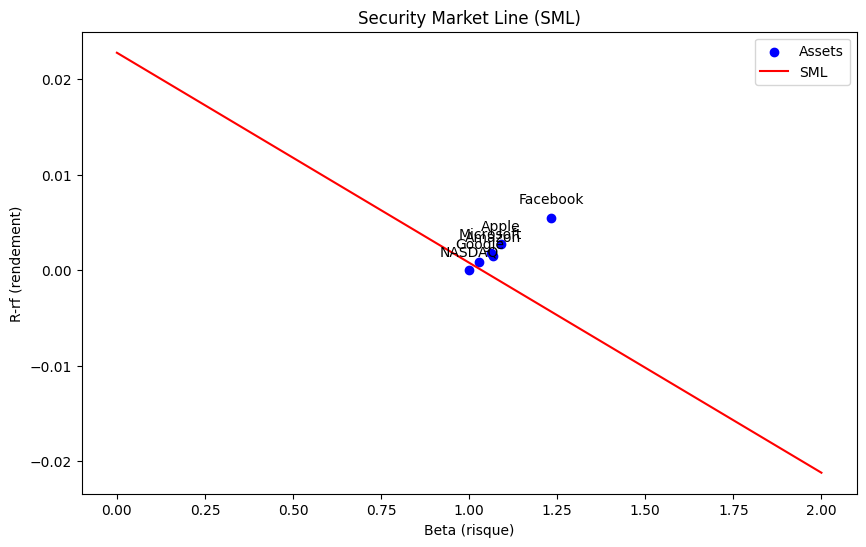

In [45]:
def plot_sml(alphas, betas, rf_rate, market_return, stock_names):
    plt.figure(figsize=(10, 6))
    plt.scatter(betas, alphas, label='Assets', color='blue')
    x = np.linspace(0, 2, 100)
    y = rf_rate + x * (market_return - rf_rate)
    plt.plot(x, y, color='red', label='SML')
    for i, txt in enumerate(stock_names):
        plt.annotate(txt, (betas[i], alphas[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.xlabel('Beta (risque)')
    plt.ylabel('R-rf (rendement)')
    plt.title('Security Market Line (SML)')
    plt.legend()
    plt.show()

# Calculer le rendement du marché
market_return = nasdaq['Return'].mean()

# Extraire les alphas et les bêtas pour le tracé
alphas = [result['Alpha'] for result in results.values()]
betas = [result['Beta'] for result in results.values()]
stock_names = list(results.keys())

# Tracer la SML
plot_sml(alphas, betas, rf_rate, market_return, stock_names)


In [79]:
tickers = ['AAPL', '^IXIC']
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Télécharger les taux sans risque et l'inflation
treasury_10yr = web.DataReader('DGS10', 'fred', start_date, end_date) / 100
inflation = web.DataReader('CPIAUCSL', 'fred', start_date, end_date).pct_change().dropna()

# Calculer les rendements
returns = data.pct_change().dropna()
apple_returns = returns['AAPL']
market_returns = returns['^IXIC']
rf_rate = treasury_10yr['DGS10'].mean()

# Aligner les données de l'inflation
inflation = inflation.reindex(returns.index).dropna()

# Fonction de nettoyage des données
def clean_data(data):
    data = data.replace([np.inf, -np.inf], np.nan)
    data = data.dropna()
    return data

# Nettoyer les données
apple_returns = clean_data(apple_returns)
market_returns = clean_data(market_returns)
treasury_10yr = clean_data(treasury_10yr)
inflation = clean_data(inflation)
# Exporter les données d'inflation nettoyées dans un fichier Excel
inflation.to_excel('inflation_data_cleaned.xlsx', engine='openpyxl')


[*********************100%%**********************]  2 of 2 completed


In [80]:

def test_stationarity(timeseries):
    adf_test = adfuller(timeseries, autolag='AIC')
    return adf_test[1]  # p-value


p_value_apple = test_stationarity(apple_returns)
p_value_market = test_stationarity(market_returns)
p_value_inflation = test_stationarity(inflation)

print(f"Apple returns p-value: {p_value_apple}")
print(f"Market returns p-value: {p_value_market}")
print(f"Inflation p-value: {p_value_inflation}")

# Stationnariser les séries si nécessaire (par différenciation)
if p_value_apple > 0.05:
    apple_returns = apple_returns.diff().dropna()
if p_value_market > 0.05:
    market_returns = market_returns.diff().dropna()
if p_value_inflation > 0.05:
    inflation = inflation.diff().dropna()


Apple returns p-value: 2.045926838558429e-20
Market returns p-value: 1.0496115421100269e-19
Inflation p-value: 0.0008702266804708321


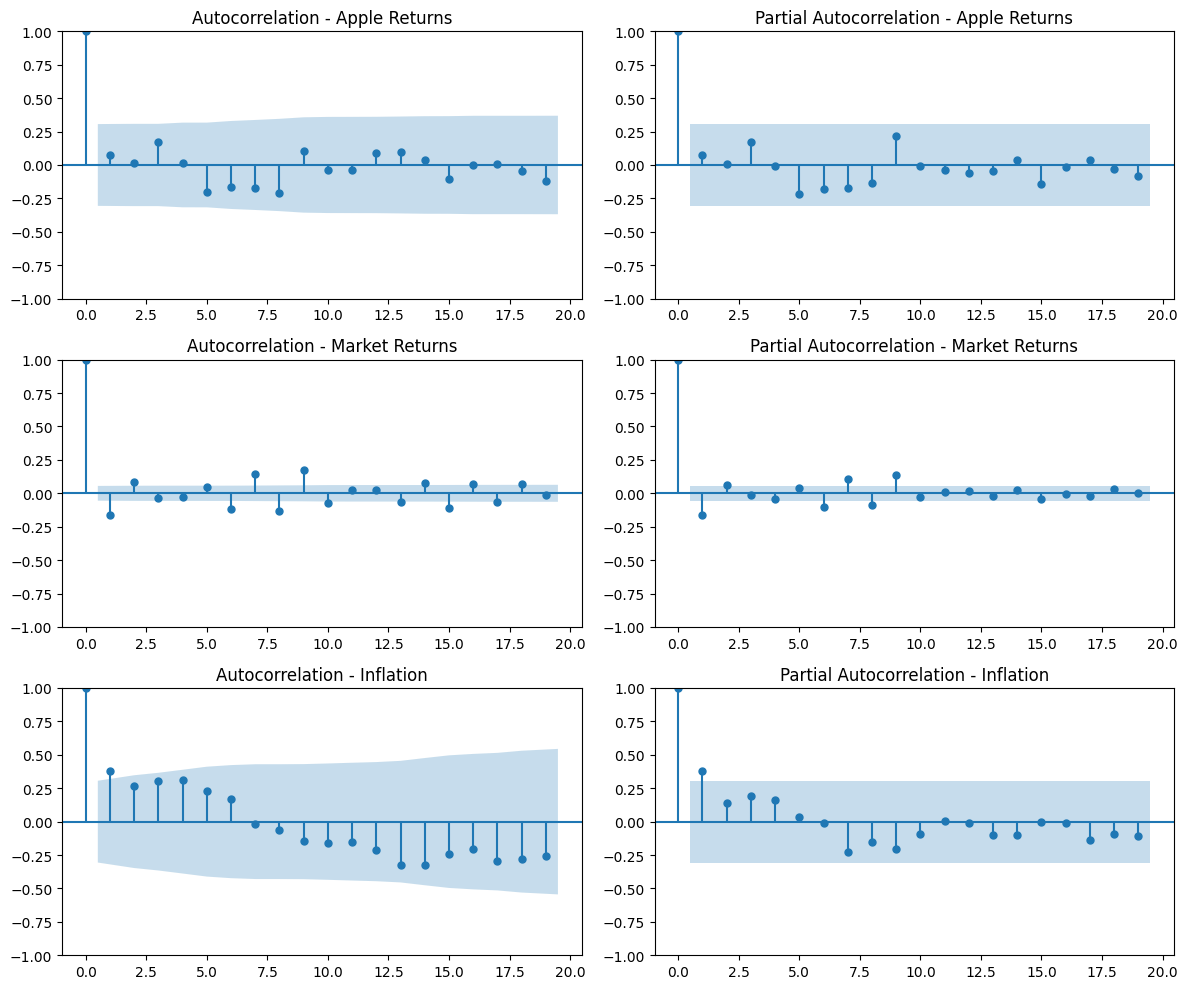

In [87]:
# Calculer le nombre maximum de décalages (lags) à utiliser
max_lags = min(19, len(apple_returns) // 2)

# Générer et afficher les corrélogrammes pour les rendements d'Apple, du marché et de l'inflation
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Corrélogramme des rendements d'Apple
plot_acf(apple_returns, ax=axes[0, 0], lags=max_lags)
axes[0, 0].set_title('Autocorrelation - Apple Returns')
plot_pacf(apple_returns, ax=axes[0, 1], lags=max_lags)
axes[0, 1].set_title('Partial Autocorrelation - Apple Returns')

# Corrélogramme des rendements du marché
plot_acf(market_returns, ax=axes[1, 0], lags=max_lags)
axes[1, 0].set_title('Autocorrelation - Market Returns')
plot_pacf(market_returns, ax=axes[1, 1], lags=max_lags)
axes[1, 1].set_title('Partial Autocorrelation - Market Returns')

# Corrélogramme de l'inflation
plot_acf(inflation, ax=axes[2, 0], lags=max_lags)
axes[2, 0].set_title('Autocorrelation - Inflation')
plot_pacf(inflation, ax=axes[2, 1], lags=max_lags)
axes[2, 1].set_title('Partial Autocorrelation - Inflation')

plt.tight_layout()
plt.show()


In [82]:
# Concatenation des données en enlevant les NaN
X = pd.concat([market_returns, inflation], axis=1).dropna()
X.columns = ['Market', 'Inflation']
X = sm.add_constant(X)

# Aligner les rendements d'Apple avec X
apple_returns = apple_returns.loc[X.index]

# Vérifier les valeurs NaN dans y
y = apple_returns - rf_rate

# Estimation du modèle
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     20.77
Date:                Sun, 26 May 2024   Prob (F-statistic):           8.03e-07
Time:                        20:23:39   Log-Likelihood:                 120.68
No. Observations:                  41   AIC:                            -235.4
Df Residuals:                      38   BIC:                            -230.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0186      0.003     -6.178      0.0